In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

In [2]:
df=pd.read_csv(".\dataset\India-Tourism-Statistics-1981-2020-fta_nri_ita.csv")
fta_nri_ita=df.copy()
fta_nri_ita.head()

,Year,FTAs in India (in million),%- change over previous year,NRIs arrivals in India (in million),%- change over the previous year,ITAs in India (in million),%- change over the previous year.1
0,1981,1.28,2.0,NaN,NaN,NaN,NaN
1,1991,1.68,-1.7,NaN,NaN,NaN,NaN
2,2001,2.54,-4.2,NaN,NaN,NaN,NaN
3,2002,2.38,-6.0,NaN,NaN,NaN,NaN
4,2003,2.73,14.3,NaN,NaN,NaN,NaN


In [3]:
fta_nri_ita.rename(columns={'FTAs in India (in million)': 'FTA','NRIs arrivals in India (in million)':'NRI','ITAs in India  (in million)':'ITA'},inplace=True, errors='raise')
fta_nri_ita.drop(fta_nri_ita.iloc[:,2::2],axis=1,inplace=True)
fta_nri_ita.head()

,Year,FTA,NRI,ITA
0,1981,1.28,NaN,NaN
1,1991,1.68,NaN,NaN
2,2001,2.54,NaN,NaN
3,2002,2.38,NaN,NaN
4,2003,2.73,NaN,NaN


[]

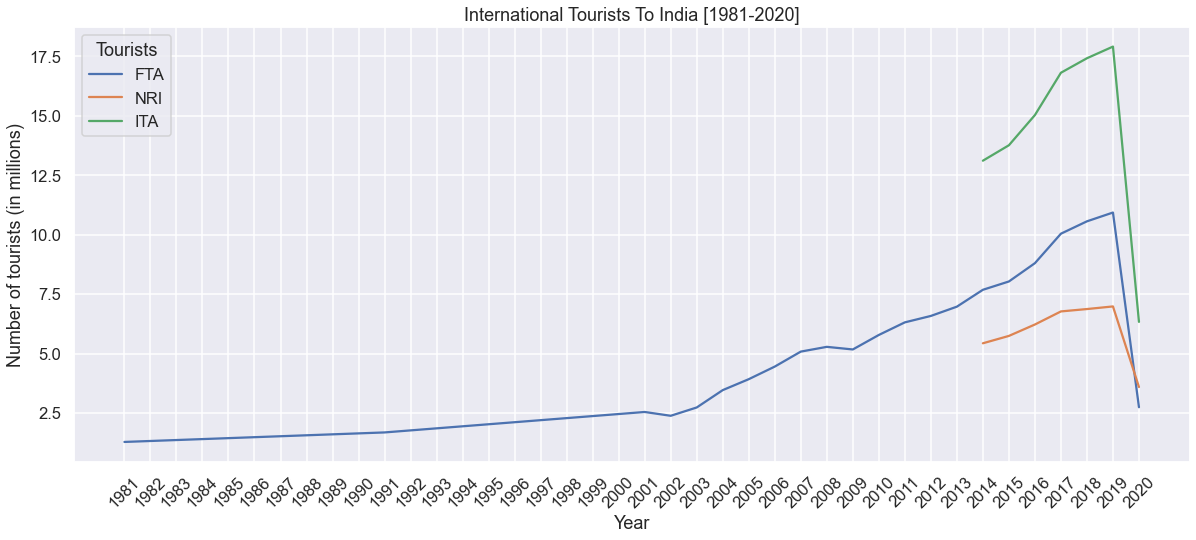

In [4]:
df=pd.melt(fta_nri_ita,['Year']).rename(columns={'variable':'Tourists'})

plt.figure(figsize=(20,8))

sns.set_context("talk")
g=sns.lineplot(x='Year', y='value', hue='Tourists', data=df)
g.set(xlabel="Year",ylabel="Number of tourists (in millions)", title="International Tourists To India [1981-2020]")
plt.xticks(
    range(1981,2021),
    rotation=45,
#     horizontalalignment='right',
    fontweight='light'
)

plt.plot()

In [5]:
quarterly=pd.read_csv(".\dataset\India-Tourism-Statistics-2001-2019-quaterly.csv").copy().rename(columns={
    '% Distribution by Quarter - 1st Quarter (Jan-Mar)':'1st Quarter',
    '% Distribution by Quarter - 2nd Quarter(Apr-June)':'2nd Quarter',
    '% Distribution by Quarter - 3rd Quarter (July-Sep)':'3rd Quarter',
    '% Distribution by Quarter - 4th Quarter (Oct-Dec)':'4th Quarter',
})
quarterly.head()

,Year,Arrivals,1st Quarter,2nd Quarter,3rd Quarter,4th Quarter
0,2001,2537282,31.3,20.2,23.0,25.5
1,2002,2384364,28.8,18.4,21.1,31.7
2,2003,2726214,27.7,17.6,22.8,31.9
3,2004,3457477,27.8,18.3,21.8,32.1
4,2005,3918610,28.3,18.4,21.4,31.9


In [6]:
tot_arrivals=quarterly[['Year','Arrivals']].copy()
tot_arrivals["Arrivals"]=tot_arrivals['Arrivals']*(10**-6)
tot_arrivals=tot_arrivals.round(decimals=2)
tot_arrivals.head()

,Year,Arrivals
0,2001,2.54
1,2002,2.38
2,2003,2.73
3,2004,3.46
4,2005,3.92


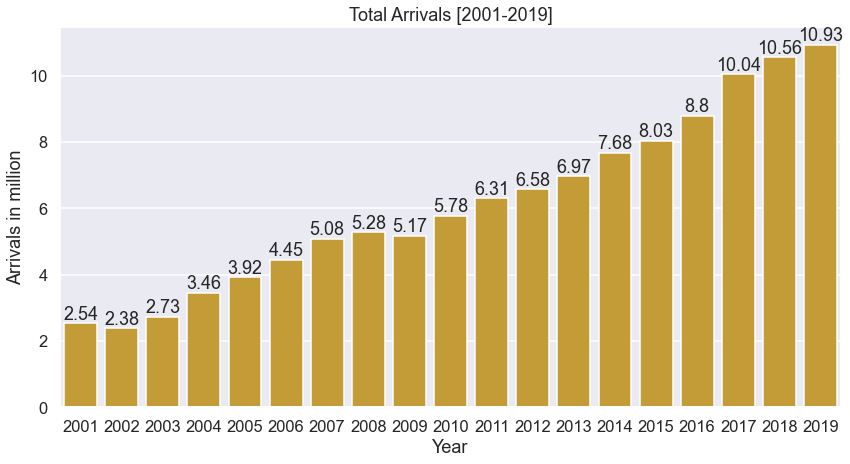

In [7]:
plt.figure(figsize=(14,7))

g=sns.barplot(x=tot_arrivals['Year'], y=tot_arrivals["Arrivals"], color='goldenrod', label="Some Label")
g.set(xlabel="Year",ylabel="Arrivals in million", title="Total Arrivals [2001-2019]")
g.bar_label(g.containers[0])

plt.show()

In [8]:
quarterly2017=quarterly[quarterly['Year']==2017].copy()
quarterly2017=quarterly2017.drop(['Arrivals','Year'],axis=1)

quarterly2018=quarterly[quarterly['Year']==2018].copy()
quarterly2018=quarterly2018.drop(['Arrivals','Year'],axis=1)

quarterly2019=quarterly[quarterly['Year']==2019].copy()
quarterly2019=quarterly2019.drop(['Arrivals','Year'],axis=1)

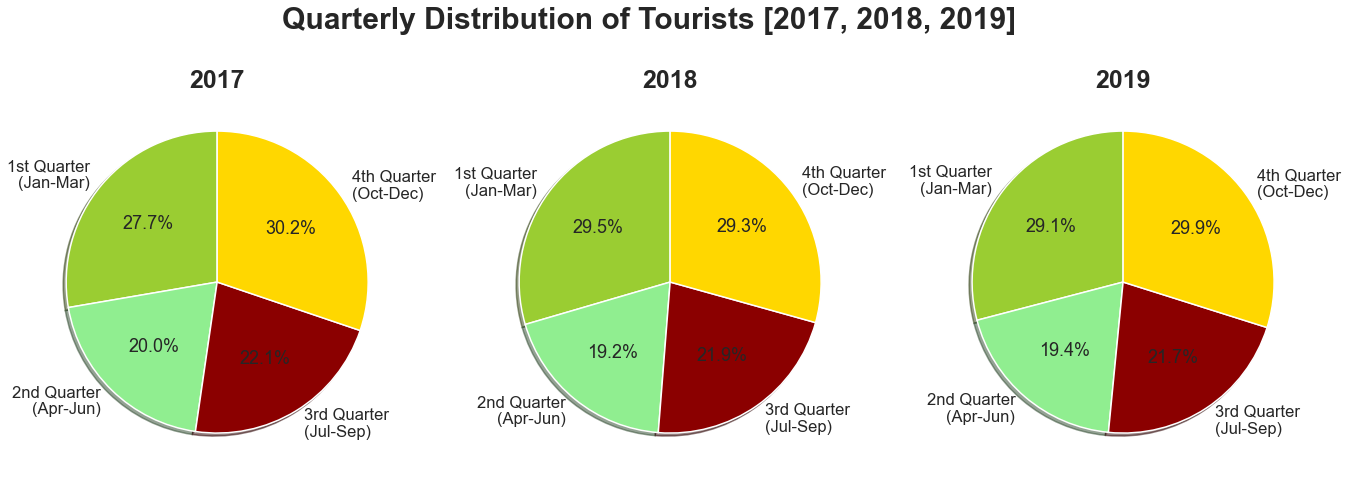

In [9]:
fig, axes = plt.subplots(1,3, sharex=True, figsize=(23,8))
fig.suptitle('Quarterly Distribution of Tourists [2017, 2018, 2019]',fontsize=30,fontweight='bold')

quarter_labels=['1st Quarter\n(Jan-Mar)','2nd Quarter\n(Apr-Jun)','3rd Quarter\n(Jul-Sep)','4th Quarter\n(Oct-Dec)']
  
# plotting data on chart
colors = ['yellowgreen', 'lightgreen', 'darkred', 'gold','darkgreen', 'red', 'lightsalmon']

axes[0].pie(quarterly2017.loc[16,:].values.tolist(), labels=quarter_labels, colors=colors, 
            autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title("2017",fontsize=25,fontweight='bold')

axes[1].pie(quarterly2018.loc[17,:].values.tolist(), labels=quarter_labels, colors=colors, 
            autopct='%1.1f%%',shadow=True, startangle=90)
axes[1].set_title("2018",fontsize=25,fontweight='bold')

axes[2].pie(quarterly2019.loc[18,:].values.tolist(), labels=quarter_labels, colors=colors, 
            autopct='%1.1f%%',shadow=True, startangle=90)
axes[2].set_title("2019",fontsize=25,fontweight='bold')
# plt.legend()

# handles, labels = plt.gca().get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper left')

# displaying chart
plt.show()

In [10]:
quarter1=quarterly[['Year','1st Quarter']].copy()
quarter2=quarterly[['Year','2nd Quarter']].copy()
quarter3=quarterly[['Year','3rd Quarter']].copy()
quarter4=quarterly[['Year','4th Quarter']].copy()
# quarter1.head()
# quarter2.head()
# quarter3.head()
# quarter4.head()

quarter1['1st Quarter']=quarter1['1st Quarter']*quarterly['Arrivals']/100
quarter2['2nd Quarter']=quarter2['2nd Quarter']*quarterly['Arrivals']/100
quarter3['3rd Quarter']=quarter3['3rd Quarter']*quarterly['Arrivals']/100
quarter4['4th Quarter']=quarter4['4th Quarter']*quarterly['Arrivals']/100
# quarter1

In [11]:
sum_arrivals=quarterly['Arrivals'].sum()

average_percentage_quarter=[
    quarter1['1st Quarter'].sum()/sum_arrivals * 100,
    quarter2['2nd Quarter'].sum()/sum_arrivals * 100,
    quarter3['3rd Quarter'].sum()/sum_arrivals * 100,
    quarter4['4th Quarter'].sum()/sum_arrivals * 100,
]
average_percentage_quarter

[28.807179062028148, 19.187795324983707, 21.64875763359771, 30.349040603325218]

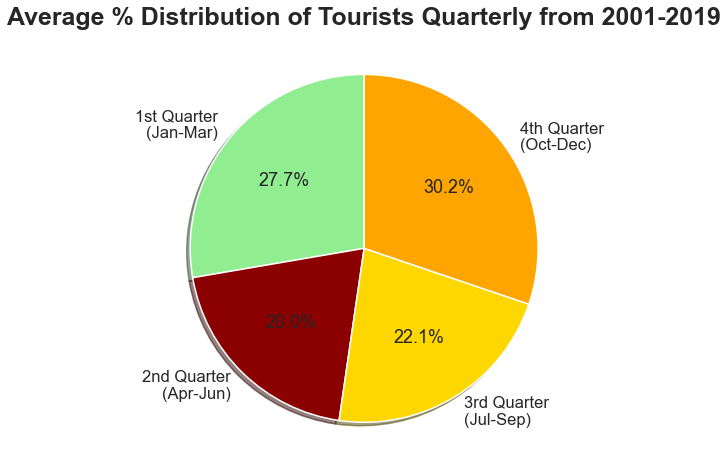

In [12]:
# plotting data on chart
colors = ['yellowgreen', 'lightgreen', 'darkred', 'gold','orange', 'red', 'lightsalmon']

plt.figure(figsize=(10,8))
plt.pie(quarterly2017.loc[16,:].values.tolist(), labels=quarter_labels, colors=colors[1:], 
            autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Average % Distribution of Tourists Quarterly from 2001-2019",fontsize=25,fontweight='bold')

# displaying chart
plt.show()

In [13]:
country_and_reason=pd.read_csv(".\dataset\India-Tourism-Statistics-2019_region-and-reason.csv")
country_and_reason.head()

,Region,Country of Nationality,Arrivals (in numbers),Business and Professional(%),Leisure Holiday and Recreation(%),Medical(%),Indian Diaspora(%),Others(%)
0,North America,CANADA,351859,4.82,50.94,0.14,21.49,22.61
1,North America,UNITED STATES,1512032,11.24,38.56,0.08,29.48,20.64
2,North America,OTHERS,1,0.00,100.00,0.00,0.00,0.00
3,North America,Total,1863892,10.03,40.90,0.09,27.97,21.01
4,Central & South America,ARGENTINA,12844,14.69,78.60,0.08,1.25,5.38


In [14]:
regionwise_reason = country_and_reason[country_and_reason['Country of Nationality']=='Total'].copy()

regionwise_reason['Business and Professional(%)']=regionwise_reason['Business and Professional(%)']*regionwise_reason['Arrivals (in numbers)']/100 * 10**-5
regionwise_reason['Leisure Holiday and Recreation(%)']=regionwise_reason['Leisure Holiday and Recreation(%)']*regionwise_reason['Arrivals (in numbers)']/100 * 10**-5
regionwise_reason['Medical(%)']=regionwise_reason['Medical(%)']*regionwise_reason['Arrivals (in numbers)']/100 * 10**-5
regionwise_reason['Indian Diaspora(%)']=regionwise_reason['Indian Diaspora(%)']*regionwise_reason['Arrivals (in numbers)']/100 * 10**-5
regionwise_reason['Others(%)']=regionwise_reason['Others(%)']*regionwise_reason['Arrivals (in numbers)']/100 * 10**-5

regionwise_reason.drop(['Arrivals (in numbers)','Country of Nationality'],axis=1,inplace=True)

regionwise_reason.rename(columns={
    'Business and Professional(%)':'Business and Professional',
    'Leisure Holiday and Recreation(%)':'Leisure Holiday and Recreation',
    'Medical(%)':'Medical',
    'Indian Diaspora(%)':'Indian Diaspora',
    'Others(%)':'Others'
},inplace=True)

regionwise_reason.set_index('Region',inplace=True)

regionwise_reason.head()

,Business and Professional,Leisure Holiday and Recreation,Medical,Indian Diaspora,Others
Region,,,,,
North America,1.869484,7.623318,0.016775,5.213306,3.916037
Central & South America,0.200226,0.636193,0.001682,0.033437,0.117722
Western Europe,3.757811,9.951118,0.021784,4.406986,3.646710
Eastern Europe,0.566949,3.265209,0.235088,0.077145,0.420419
Africa,0.676429,1.128952,0.523897,0.272456,1.021346


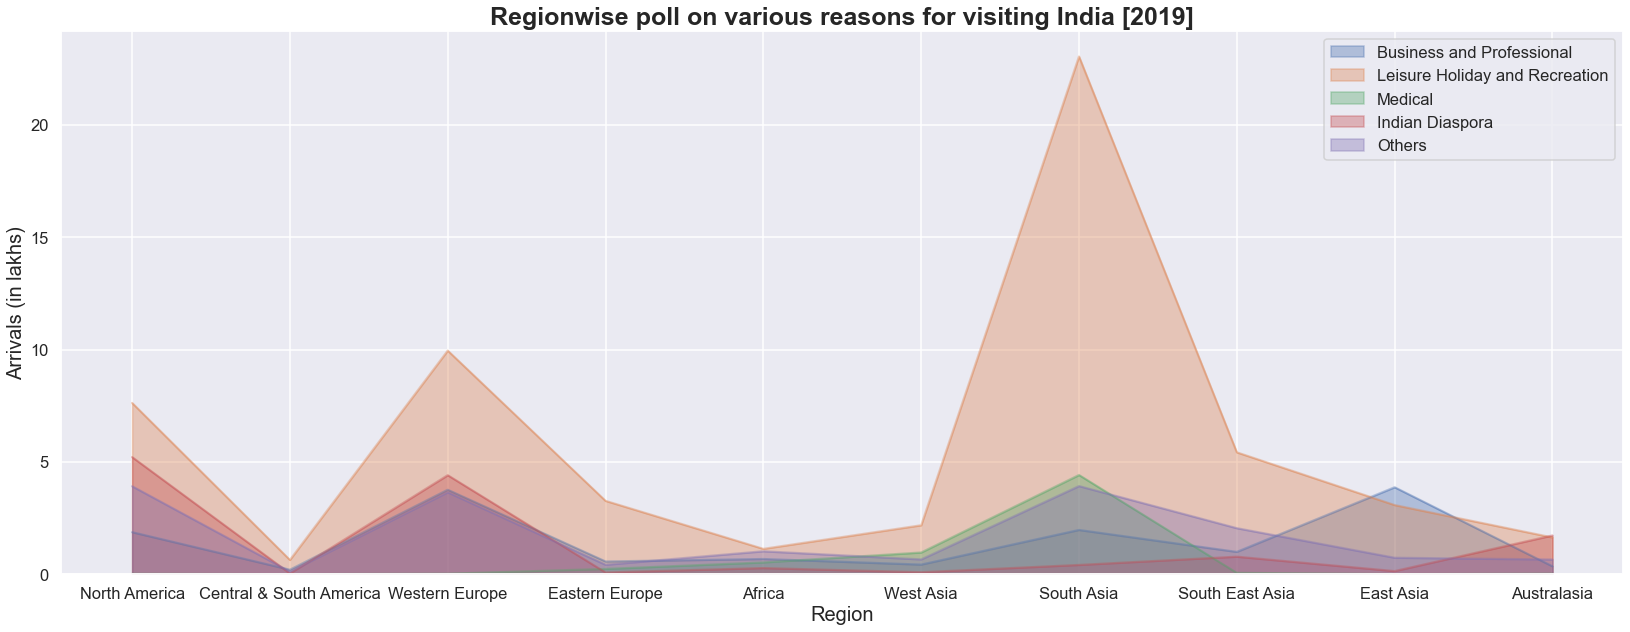

In [15]:
g=regionwise_reason.plot(kind = 'area',
              stacked = False,
              alpha = 0.37, # transparency coefficient, default 0.5, can set between 0 - 1
              figsize =(28,10),
             )

g.set_xticks(range(len(regionwise_reason.index)));
g.set_xticklabels(regionwise_reason.index);

plt.title('Regionwise poll on various reasons for visiting India [2019]',fontsize=25,fontweight='bold')
plt.xlabel('Region',fontsize=20)
plt.ylabel('Arrivals (in lakhs)',fontsize=20)
plt.xticks()

plt.show()

In [16]:
countrywise=country_and_reason[country_and_reason['Country of Nationality'].isin(['Total','Grand Total','Not Classified Elsewhere','OTHERS'])==False].copy()
countrywise.sort_values(by=["Arrivals (in numbers)"],ascending=False, inplace = True)
countrywise=countrywise.iloc[0:5,:]
countrywise.drop(["Region"],axis=1,inplace=True)

countrywise.rename(columns={
    'Business and Professional(%)':'Business and Professional',
    'Leisure Holiday and Recreation(%)':'Leisure Holiday and Recreation',
    'Medical(%)':'Medical',
    'Indian Diaspora(%)':'Indian Diaspora',
    'Others(%)':'Others'
},inplace=True)

countrywise['Business and Professional']=countrywise['Business and Professional']*countrywise['Arrivals (in numbers)']/100 * 10**-3
countrywise['Leisure Holiday and Recreation']=countrywise['Leisure Holiday and Recreation']*countrywise['Arrivals (in numbers)']/100 * 10**-3
countrywise['Medical']=countrywise['Medical']*countrywise['Arrivals (in numbers)']/100* 10**-3
countrywise['Indian Diaspora']=countrywise['Indian Diaspora']*countrywise['Arrivals (in numbers)']/100* 10**-3
countrywise['Others']=countrywise['Others']*countrywise['Arrivals (in numbers)']/100* 10**-3

countrywise.drop(["Arrivals (in numbers)"],axis=1,inplace=True)
countrywise.head()

,Country of Nationality,Business and Professional,Leisure Holiday and Recreation,Medical,Indian Diaspora,Others
55,BANGLADESH,108.522307,1994.129607,396.969958,20.364043,57.741085
1,UNITED STATES,169.952397,583.039539,1.209626,445.747034,312.083405
24,UNITED KINGDOM,107.931507,405.418348,1.000292,302.688359,183.153465
78,AUSTRALIA,29.893417,132.904518,0.367241,154.645185,49.430639
0,CANADA,16.959604,179.236975,0.492603,75.614499,79.555320


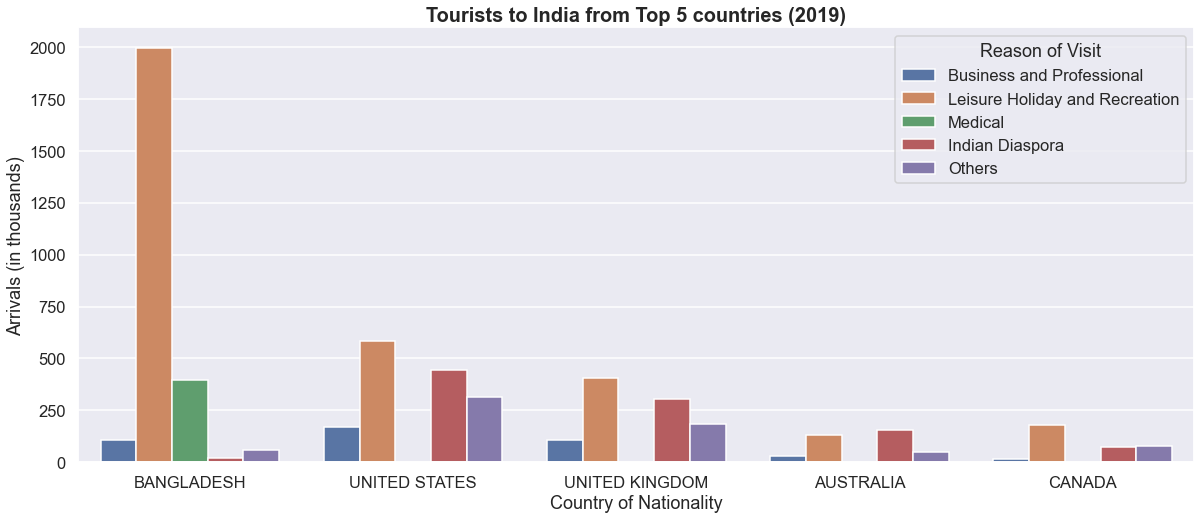

In [17]:
df=pd.melt(countrywise,['Country of Nationality']).rename(columns={"variable":"Reason of Visit"})

plt.figure(figsize=(20,8))
# country v / s reason barplot
sns.barplot(x ='Country of Nationality',y='value', hue="Reason of Visit",data = df)

plt.ylabel("Arrivals (in thousands)",fontsize=18)
plt.xlabel('Country of Nationality',fontsize=18)
plt.title("Tourists to India from Top 5 countries (2019)",fontsize=20,fontweight='bold')
 
# Show the plot
plt.show()

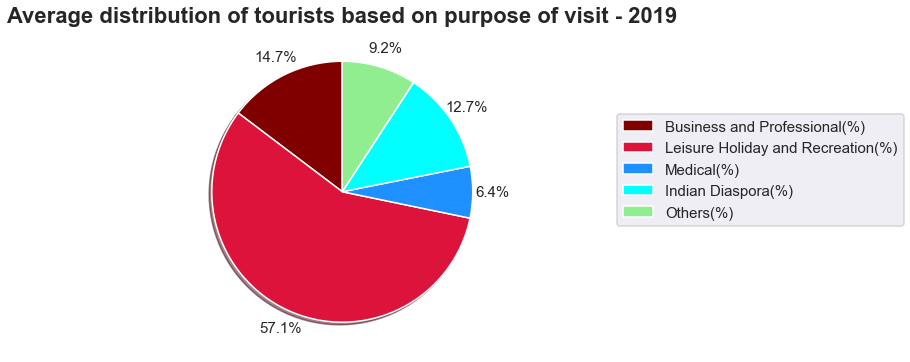

In [18]:
grand_total=country_and_reason[country_and_reason['Country of Nationality']=='Grand Total'].copy()

reason_list=['Business and Professional(%)','Leisure Holiday and Recreation(%)','Medical(%)','Indian Diaspora(%)','Others(%)']
# plotting data on chart
colors = ['maroon', 'crimson', 'dodgerblue', 'aqua', 'lightgreen']

plt.figure(figsize=(8,6))

pie=plt.pie(grand_total.loc[83,:].values.tolist()[3:], colors=colors, 
            autopct='%1.1f%%',shadow=True, startangle=90,textprops={'fontsize': 15},pctdistance = 1.15,)
# plt.legend()
plt.legend(pie[0],reason_list, bbox_to_anchor=(1.5,0.7), loc="upper right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)

plt.title("Average distribution of tourists based on purpose of visit - 2019",fontsize=22,fontweight='bold')

# displaying chart
plt.show()

In [19]:
country_and_share=pd.read_csv(".\dataset\India-Tourism-Statistics-region-2017-2019.csv")
country_and_share.head()

,Region,Country of Nationality,Number of Arrivals - 2017,Number of Arrivals - 2018,Number of Arrivals - 2019,Percentage Share - 2017,Percentage Share - 2018,Percentage Share - 2019,Percentage Change - 2018/17,Percentage Change - 2019/18
0,North America,Canada,335439.0,351040.0,351859,3.34,3.32,3.22,4.7,0.2
1,North America,U.S.A,1376919.0,1456678.0,1512032,13.72,13.80,13.83,5.8,3.8
2,North America,Others,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
3,North America,Total,1712358.0,1807718.0,1863892,17.06,17.12,17.05,5.6,3.1
4,Central and South America,Argentina,14875.0,16345.0,12844,0.15,0.15,0.12,9.9,-21.4


In [20]:
regionwise_share=country_and_share[country_and_share['Country of Nationality']=='Total'].copy()
regionwise_share=regionwise_share[['Region','Percentage Share - 2017','Percentage Share - 2018','Percentage Share - 2019']]
regionwise_share.set_index('Region',inplace=True)
regionwise_share.head()

,Percentage Share - 2017,Percentage Share - 2018,Percentage Share - 2019
Region,,,
North America,17.06,17.12,17.05
Central and South America,0.92,0.96,0.91
Western Europe,21.26,21.25,19.93
Eastern Europe,4.71,4.41,4.18
Africa,3.17,3.33,3.31


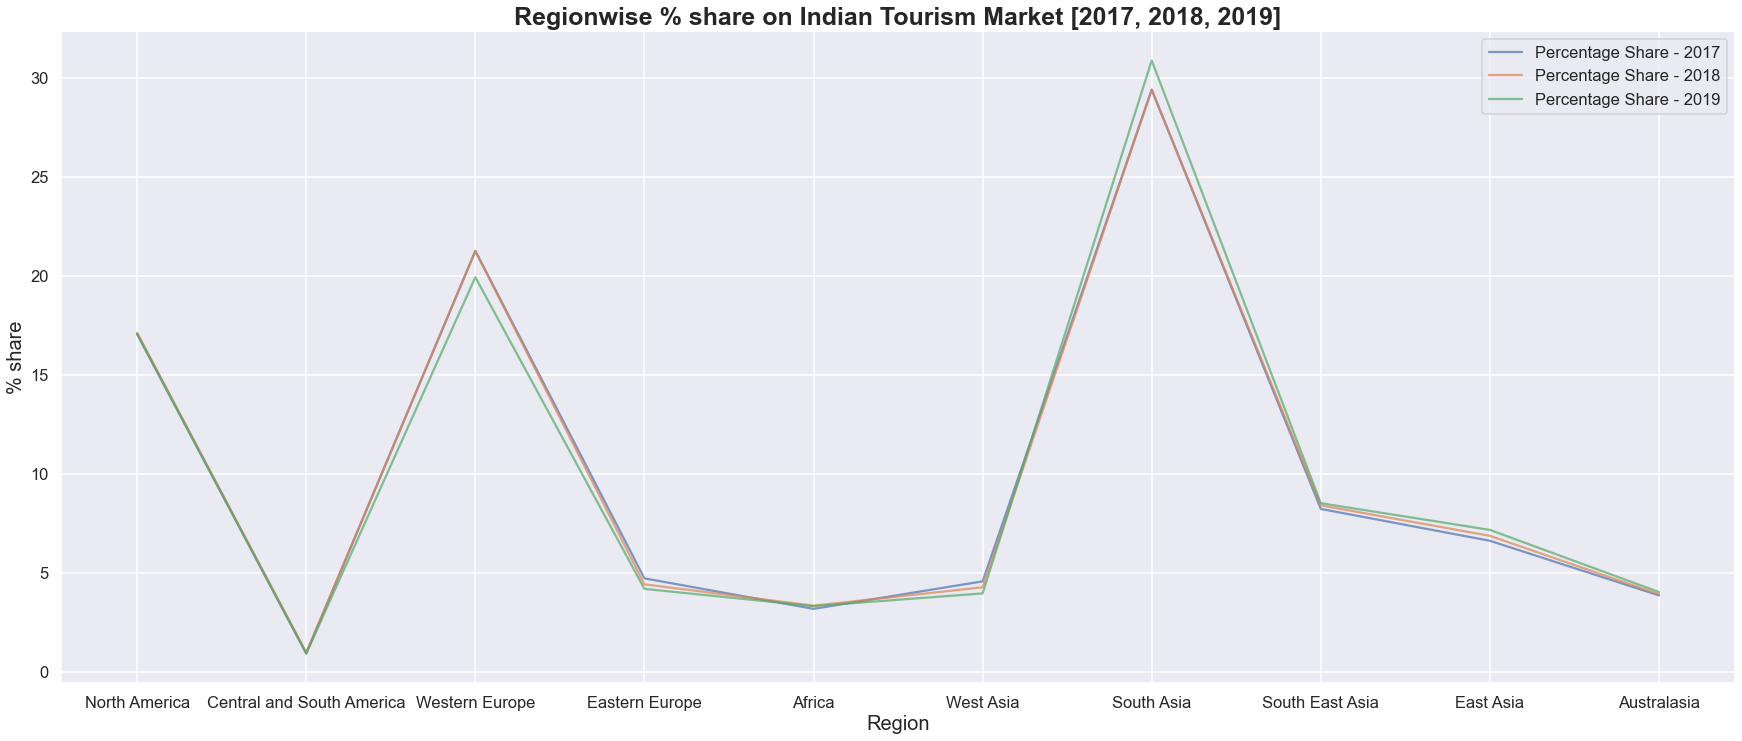

In [21]:
g=regionwise_share.plot(kind = 'line',
              stacked = False,
              alpha = 0.7, # transparency coefficient, default 0.5, can set between 0 - 1
              figsize =(30,12),
             )

g.set_xticks(range(len(regionwise_share.index)));
g.set_xticklabels(regionwise_share.index);

plt.title('Regionwise % share on Indian Tourism Market [2017, 2018, 2019]',fontsize=25,fontweight='bold')
plt.xlabel('Region',fontsize=20)
plt.ylabel('% share',fontsize=20)
plt.xticks()

plt.show()

In [22]:
# obtaining 6 countries with highest shares during 2017
highest_countrywise_2017=country_and_share[country_and_share['Country of Nationality'].isin(
    ['Total','Grand Total','Not Classified elsewhere','Others'])==False].copy()
highest_countrywise_2017=highest_countrywise_2017[['Country of Nationality','Percentage Share - 2017']]
highest_countrywise_2017.sort_values(by=['Percentage Share - 2017'],ascending=False,inplace=True)
highest_countrywise_2017=highest_countrywise_2017.iloc[0:6,:]

perc_sum=highest_countrywise_2017['Percentage Share - 2017'].sum()

highest_countrywise_2017=pd.concat(
    [highest_countrywise_2017,pd.DataFrame.from_records([{'Country of Nationality':'Others','Percentage Share - 2017':(100-perc_sum)}])],
    ignore_index=True)


# obtaining 6 countries with highest shares during 2018
highest_countrywise_2018=country_and_share[country_and_share['Country of Nationality'].isin(
    ['Total','Grand Total','Not Classified elsewhere','Others'])==False].copy()
highest_countrywise_2018=highest_countrywise_2018[['Country of Nationality','Percentage Share - 2018']]
highest_countrywise_2018.sort_values(by=['Percentage Share - 2018'],ascending=False,inplace=True)
highest_countrywise_2018=highest_countrywise_2018.iloc[0:6,:]

perc_sum=highest_countrywise_2018['Percentage Share - 2018'].sum()

highest_countrywise_2018=pd.concat(
    [highest_countrywise_2018,pd.DataFrame.from_records([{'Country of Nationality':'Others','Percentage Share - 2018':(100-perc_sum)}])],
    ignore_index=True)


# obtaining 6 countries with highest shares during 2019
highest_countrywise_2019=country_and_share[country_and_share['Country of Nationality'].isin(
    ['Total','Grand Total','Not Classified elsewhere','Others'])==False].copy()
highest_countrywise_2019=highest_countrywise_2019[['Country of Nationality','Percentage Share - 2019']]
highest_countrywise_2019.sort_values(by=['Percentage Share - 2019'],ascending=False,inplace=True)
highest_countrywise_2019=highest_countrywise_2019.iloc[0:6,:]

perc_sum=highest_countrywise_2019['Percentage Share - 2019'].sum()

highest_countrywise_2019=pd.concat(
    [highest_countrywise_2019,pd.DataFrame.from_records([{'Country of Nationality':'Others','Percentage Share - 2019':(100-perc_sum)}])],
    ignore_index=True)


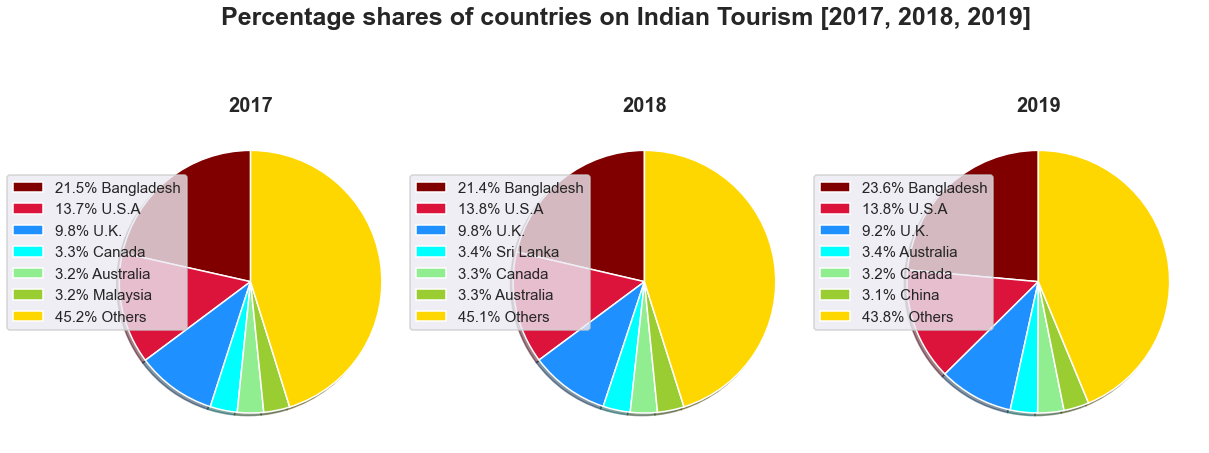

In [76]:
fig, axes = plt.subplots(1,3, sharex=True, figsize=(20,8))
fig.suptitle('Percentage shares of countries on Indian Tourism [2017, 2018, 2019]',fontsize=25,fontweight='bold')

# plotting data on chart
#2017
colors = ['maroon', 'crimson', 'dodgerblue', 'aqua', 'lightgreen','yellowgreen', 'gold']

pie=axes[0].pie(highest_countrywise_2017['Percentage Share - 2017'], colors=colors, shadow=True, startangle=90)
percents=highest_countrywise_2017['Percentage Share - 2017']*100/highest_countrywise_2017['Percentage Share - 2017'].sum()
axes[0].legend(
    pie[0],[f'{p:.1f}% {l}'  for p ,l in zip(percents, highest_countrywise_2017['Country of Nationality'])],
    bbox_to_anchor=(0.2,0.7),
    loc="upper right", fontsize=15, 
    bbox_transform=plt.gcf().transFigure)
axes[0].set_title("2017",fontsize=20,fontweight='bold')

#2018
pie=axes[1].pie(highest_countrywise_2018['Percentage Share - 2018'], colors=colors, shadow=True, startangle=90)
percents=highest_countrywise_2018['Percentage Share - 2018']*100/highest_countrywise_2018['Percentage Share - 2018'].sum()
axes[1].legend(
    pie[0],[f'{p:.1f}% {l}'  for p ,l in zip(percents, highest_countrywise_2018['Country of Nationality'])],
    bbox_to_anchor=(0.48,0.7),
    loc="upper right", fontsize=15, 
    bbox_transform=plt.gcf().transFigure)
axes[1].set_title("2018",fontsize=20,fontweight='bold')

#2019
pie=axes[2].pie(highest_countrywise_2019['Percentage Share - 2019'],  colors=colors, shadow=True, startangle=90)
percents=highest_countrywise_2019['Percentage Share - 2019']*100/highest_countrywise_2019['Percentage Share - 2019'].sum()
axes[2].legend(
    pie[0],[f'{p:.1f}% {l}'  for p ,l in zip(percents, highest_countrywise_2019['Country of Nationality'])],
    bbox_to_anchor=(0.76,0.7),
    loc="upper right", fontsize=15, 
    bbox_transform=plt.gcf().transFigure)
axes[2].set_title("2019",fontsize=20,fontweight='bold')
# plt.legend()

# handles, labels = plt.gca().get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper left')

# displaying chart
plt.show()

In [24]:
agegroup=pd.read_csv(".\dataset\India-Tourism-Statistics-2001-2019-agegroup.csv")
agegroup.head()

,Year,FTAs,% distribution by Age-Group (in Year) - 0-14,% distribution by Age-Group (in Year) - 15-24,% distribution by Age-Group (in Year) - 25-34,% distribution by Age-Group (in Year) - 35-44,% distribution by Age-Group (in Year) - 45-54,% distribution by Age-Group (in Year) - 55-64,% distribution by Age-Group (in Year) - 65 and above,% distribution by Age-Group (in Year) - Not Reported
0,2001,2537282,7.0,10.8,20.1,21.1,19.4,11.9,6.7,3.0
1,2002,2384364,9.2,10.0,19.4,21.6,19.4,11.5,7.7,1.2
2,2003,2726214,7.2,10.0,19.5,21.6,19.4,11.5,7.7,3.1
3,2004,3457477,8.5,9.8,18.8,21.3,19.4,12.8,8.2,0.2
4,2005,3918610,8.6,9.6,18.8,21.3,19.5,13.0,8.7,0.5


In [25]:
agegroup_elaborate=agegroup.copy().rename(columns={
    '% distribution by Age-Group (in Year) - 0-14':'0-14',
    '% distribution by Age-Group (in Year) - 15-24':'15-24',
    '% distribution by Age-Group (in Year) - 25-34':'25-34',
    '% distribution by Age-Group (in Year) - 35-44':'35-44',
    '% distribution by Age-Group (in Year) - 45-54':'45-54',
    '% distribution by Age-Group (in Year) - 55-64':'55-64',
    '% distribution by Age-Group (in Year) - 65 and above':'65 and above',
    '% distribution by Age-Group (in Year) - Not Reported':'Not Reported',
})

agegroup_elaborate['0-14']=agegroup_elaborate['0-14']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['15-24']=agegroup_elaborate['15-24']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['25-34']=agegroup_elaborate['25-34']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['35-44']=agegroup_elaborate['35-44']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['45-54']=agegroup_elaborate['45-54']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['55-64']=agegroup_elaborate['55-64']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['65 and above']=agegroup_elaborate['65 and above']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['Not Reported']=agegroup_elaborate['Not Reported']*agegroup_elaborate['FTAs']/100 * 10**-3

agegroup_elaborate.head()

,Year,FTAs,0-14,15-24,25-34,35-44,45-54,55-64,65 and above,Not Reported
0,2001,2537282,177.609740,274.026456,509.993682,535.366502,492.232708,301.936558,169.997894,76.118460
1,2002,2384364,219.361488,238.436400,462.566616,515.022624,462.566616,274.201860,183.596028,28.612368
2,2003,2726214,196.287408,272.621400,531.611730,588.862224,528.885516,313.514610,209.918478,84.512634
3,2004,3457477,293.885545,338.832746,650.005676,736.442601,670.750538,442.557056,283.513114,6.914954
4,2005,3918610,337.000460,376.186560,736.698680,834.663930,764.128950,509.419300,340.919070,19.593050


[]

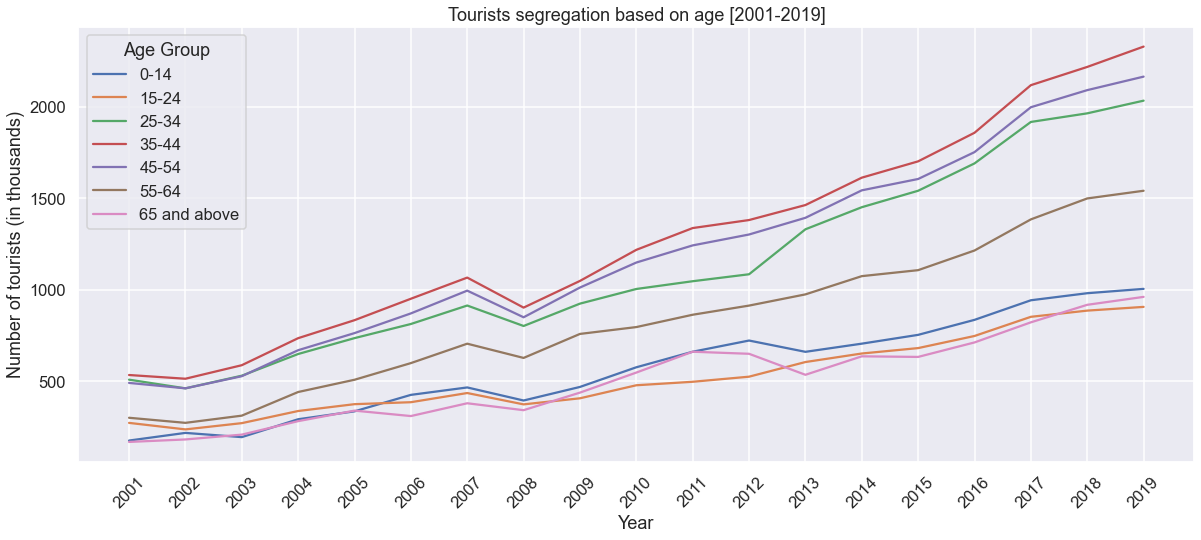

In [26]:
agegroup_elaborate.drop(['FTAs','Not Reported'],axis=1 ,inplace=True)
df=pd.melt(agegroup_elaborate,['Year']).rename(columns={"variable":"Age Group"})

plt.figure(figsize=(20,8))

sns.set_context("talk")

g=sns.lineplot(x='Year', y='value', hue='Age Group', data=df)
g.set(xlabel="Year",ylabel="Number of tourists (in thousands)", title="Tourists segregation based on age [2001-2019]")
plt.xticks(
    range(2001,2020),
    rotation=45,
#     horizontalalignment='right',
    fontweight='light'
)

plt.plot()

In [27]:
tot_fta=agegroup['FTAs'].sum()

avg_agegroup_pctg=[
    agegroup_elaborate['0-14'].sum()*10**5/tot_fta,
    agegroup_elaborate['15-24'].sum()*10**5/tot_fta,
    agegroup_elaborate['25-34'].sum()*10**5/tot_fta,
    agegroup_elaborate['35-44'].sum()*10**5/tot_fta,
    agegroup_elaborate['45-54'].sum()*10**5/tot_fta,
    agegroup_elaborate['55-64'].sum()*10**5/tot_fta,
    agegroup_elaborate['65 and above'].sum()*10**5/tot_fta
]

print(avg_agegroup_pctg)

[9.290327244694959, 8.526830283828492, 18.353340597195853, 20.92885960109853, 19.620265319294138, 13.637821302553538, 8.356931097199208]


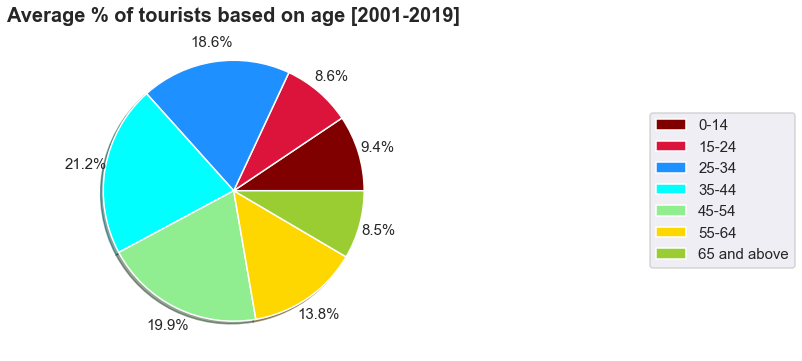

In [28]:
# plotting data on chart
colors = ['maroon', 'crimson', 'dodgerblue', 'aqua', 'lightgreen','gold','yellowgreen']
agegroup_list=['0-14','15-24','25-34','35-44','45-54','55-64','65 and above']

plt.figure(figsize=(8,6))

pie=plt.pie(avg_agegroup_pctg, colors=colors, 
            autopct='%1.1f%%',shadow=True, startangle=0,textprops={'fontsize': 15},pctdistance = 1.15,)
# plt.legend()
plt.legend(pie[0],agegroup_list, bbox_to_anchor=(1.5,0.7), loc="upper right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)

plt.title("Average % of tourists based on age [2001-2019]",fontsize=20,fontweight='bold')

# displaying chart
plt.show()

In [29]:
statewise_data=pd.read_csv(".\dataset\India-Tourism-Statistics-statewise_2019-2020_domestic_foreign.csv")
statewise_data.head()

,S. No.,States/UTs,Domestic -2019,Foreign - 2019,Domestic -2020,Foreign - 2020,Growth rate - DTV 2020/19,Growth rate - FTV 2020/19
0,1,A&N Island,505398,16206,191207,5412,-62.17,-66.6
1,2,Andhra Pradesh,237051508,280356,70828590,67591,-70.12,-75.89
2,3,Arunachal Pradesh,555639,7825,42871,961,-92.28,-87.72
3,4,Assam,5447805,26878,1266898,7285,-76.74,-72.9
4,5,Bihar,33990038,1093141,5638024,308080,-83.41,-71.82
